In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata = sc.read_h5ad('h5ad/meninges_integrated.h5ad')
adata

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


AnnData object with n_obs × n_vars = 10839 × 3266
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'leiden_R', 'celltype', 'keep'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_colors', 'condition_colors', 'filter_rna_colors', 'hvg', 'is_doublet_colors', 'keep_colors', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'dist

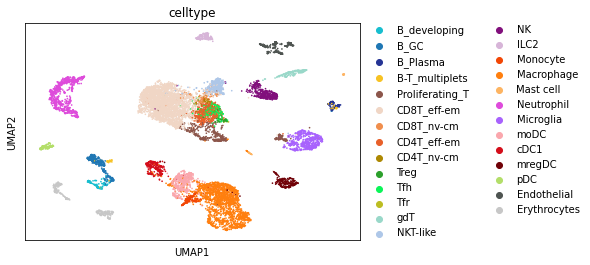

In [2]:
sc.pl.umap(adata, color = 'celltype')

In [3]:
adata_raw = sc.read_h5ad('h5ad/combined_raw.h5ad')
adata_raw = adata_raw[adata_raw.obs_names.isin(adata.obs_names)].copy()
adata_raw.obs = adata.obs.copy()
adata_raw.obsm = adata.obsm.copy()
adata_raw

AnnData object with n_obs × n_vars = 10839 × 29836
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'leiden_R', 'celltype', 'keep'
    uns: 'filter_rna_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [4]:
### convert to human symbols first
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [5]:
%%R -i adata_raw
adata_raw

class: SingleCellExperiment 
dim: 29836 10839 
metadata(1): filter_rna_colors
assays(2): X counts
rownames(29836): Xkr4 Gm1992 ... Vmn2r122 CAAA01147332.1
rowData names(0):
colnames(10839): Men_naive_AAACCCATCATCTGTT-1
  Men_naive_AAACGAAGTCATACCA-1 ... VSV_HUB_TTTGTTGTCAATCCAG-1
  VSV_HUB_TTTGTTGTCTCAACGA-1
colData names(26): sample_id condition ... celltype keep
reducedDimNames(2): PCA UMAP
altExpNames(0):


In [6]:
%%R
library(biomaRt)
library(dplyr)
mart <- useMart("ensembl", dataset="hsapiens_gene_ensembl")
m <- getBM(attributes=c("external_gene_name", "mmusculus_homolog_associated_gene_name"), mart=mart)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:biomaRt’:

    select


R[write to console]: The following object is masked from ‘package:Biobase’:

    combine


R[write to console]: The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


R[write to console]: The following object is masked from ‘package:GenomeInfoDb’:

    intersect


R[write to console]: The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


R[write to console]: The following object is masked from ‘package:matrixStats’:

    count


R[write to console]: The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


R[write to console]: The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


R[write to console]: The following objects are masked from ‘pac

In [7]:
%%R
library(SingleCellExperiment)
counts <- counts(adata_raw)
idx <- match(row.names(counts), m$mmusculus_homolog_associated_gene_name)
ids <- m$external_gene_name[idx]

In [8]:
%%R
adata_raw_h <- adata_raw[-which(is.na(ids)), ]
adata_raw_h

class: SingleCellExperiment 
dim: 18136 10839 
metadata(1): filter_rna_colors
assays(2): X counts
rownames(18136): Xkr4 Rp1 ... mt-Cytb Gm16367
rowData names(0):
colnames(10839): Men_naive_AAACCCATCATCTGTT-1
  Men_naive_AAACGAAGTCATACCA-1 ... VSV_HUB_TTTGTTGTCAATCCAG-1
  VSV_HUB_TTTGTTGTCTCAACGA-1
colData names(26): sample_id condition ... celltype keep
reducedDimNames(2): PCA UMAP
altExpNames(0):


In [9]:
%%R -o idsx
idsx <- ids[!is.na(ids)]

In [10]:
%R -o adata_raw_h

In [11]:
adata_raw_h.var_names = list(idsx)
adata_raw_h.var_names_make_unique()
adata_raw_h

AnnData object with n_obs × n_vars = 10839 × 18136
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'S_score', 'G2M_score', 'phase', 'leiden', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_DARK_ZONE_VS_NAIVE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_DARK_ZONE_BCELL_UP', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_DN', 'GSE23925_LIGHT_ZONE_VS_NAIVE_BCELL_UP', 'leiden_R', 'celltype', 'keep'
    uns: 'filter_rna_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [12]:
### only need condition and celltype
adata_raw_h.obs = adata_raw_h.obs[['sample_id', 'condition', 'site', 'sequencing_batch', 'celltype',]]
adata_raw_h.uns = {}
adata_raw_h

AnnData object with n_obs × n_vars = 10839 × 18136
    obs: 'sample_id', 'condition', 'site', 'sequencing_batch', 'celltype'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [13]:
# normalise
sc.pp.normalize_total(adata_raw_h, target_sum=1e4)

In [14]:
adata_raw_h.obs['cpdb_celltype'] = [x + '_' + y for x,y in zip(adata_raw_h.obs['condition'], adata_raw_h.obs['celltype'])]

In [15]:
# split into condition
naive = adata_raw_h[adata_raw_h.obs['condition'] == 'naive'].copy()
vsv = adata_raw_h[adata_raw_h.obs['condition'] == 'VSV'].copy()

In [16]:
# save
naive.write_h5ad('h5ad/meninges_integrated_naive.h5ad', compression = 'gzip')

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cpdb_celltype' as categorical


In [17]:
vsv.write_h5ad('h5ad/meninges_integrated_vsv.h5ad', compression = 'gzip')

/home/jovyan/my-conda-envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cpdb_celltype' as categorical


In [18]:
# write out the meta
naive_meta = pd.DataFrame(naive.obs['cpdb_celltype']).reset_index()
naive_meta.columns = ['cell', 'Cell_type']
naive_meta.to_csv('h5ad/meninges_integrated_naive_meta.txt', sep = '\t', index = False)

In [19]:
# write out the meta
vsv_meta = pd.DataFrame(vsv.obs['cpdb_celltype']).reset_index()
vsv_meta.columns = ['cell', 'Cell_type']
vsv_meta.to_csv('h5ad/meninges_integrated_vsv_meta.txt', sep = '\t', index = False)

```bash
conda activate cpdb
cd /home/jovyan/Zach/scanpy/
cellphonedb method statistical_analysis h5ad/meninges_integrated_naive_meta.txt h5ad/meninges_integrated_naive.h5ad --threads=23 --output-path naive_cpdb --counts-data gene_name

cellphonedb method statistical_analysis h5ad/meninges_integrated_vsv_meta.txt h5ad/meninges_integrated_vsv.h5ad --threads=23 --output-path vsv_cpdb --counts-data gene_name
```

### prepare the SCE object from cpdb h5ad

In [20]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata1 = sc.read_h5ad('h5ad/meninges_integrated_naive.h5ad')
adata2 = sc.read_h5ad('h5ad/meninges_integrated_vsv.h5ad')

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


In [21]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
%R -i adata1

In [23]:
%R -i adata2

In [24]:
%%R
sce <- cbind(adata1, adata2)
sce

class: SingleCellExperiment 
dim: 18136 10839 
metadata(0):
assays(2): X counts
rownames(18136): XKR4 RP1 ... MT-CYB PRAMEF15-26
rowData names(0):
colnames(10839): Men_naive_AAACCCATCATCTGTT-1
  Men_naive_AAACGAAGTCATACCA-1 ... VSV_HUB_TTTGTTGTCAATCCAG-1
  VSV_HUB_TTTGTTGTCTCAACGA-1
colData names(6): sample_id condition ... celltype cpdb_celltype
reducedDimNames(2): PCA UMAP
altExpNames(0):


In [25]:
%%R
saveRDS(sce, 'h5ad/meninges_integrated_naive_vsv_cpdb.RDS')